In [1]:
#importing necessary python packages
import pandas as pd
import numpy as np
import os
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [2]:
# Importing the dataset
dt = pd.read_excel('Flux Clinical.xlsx',index_col=0)

In [3]:
dt.shape

(517, 2309)

In [4]:
dt.head(2)

,'3DSPHR','3HBCOAHLm','ABTArm','ABTD','ACACT1r','ACACT1rm','ACACT1x','ACOAD9m','ACOAO7p','ACOATA',...,Tissue Source Site_NJ,Tissue Source Site_O1,Tissue Source Site_S2,Person Neoplasm Status_TUMOR FREE,Person Neoplasm Status_WITH TUMOR,Vial number_A,Vial number_B,Patient's Vital Status_Alive,Patient's Vital Status_Dead,Overall Survival (Months)
HUG0_SYMBOL,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,11.448262,154.187481,-583.764387,-14.237357,125.403072,235.338244,457.654536,74.716367,72.493260,-165.591744,...,0,0,0,1,0,1,0,1,0,0.00
TCGA-05-4249-01,9.173955,162.200877,-442.863722,-5.338254,128.134267,137.492687,149.939274,75.026103,56.620656,-73.252506,...,0,0,0,1,0,1,0,1,0,50.03


In [5]:
del dt['Column1']
del dt['Patient\'s Vital Status_Dead']
del dt['Patient\'s Vital Status_Alive']
dt.shape

(517, 2306)

In [6]:
X = dt.iloc[:,0:2305].values
y = dt.iloc[:, -1].values

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.fit_transform(X_val)

In [9]:
sc_y = StandardScaler()
y_train = np.squeeze(sc_y.fit_transform(y_train.reshape(-1, 1)))
y_val = np.squeeze(sc_y.transform(y_val.reshape(-1, 1)))
y_test = np.squeeze(sc_y.transform(y_test.reshape(-1, 1)))

In [10]:
#Create Deep Neural Network Architecuture
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               295168    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 460,033
Trainable params: 460,033
Non-trainable params: 0
_________________________________________________________________


In [11]:
NN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2)

Train on 264 samples, validate on 66 samples
Epoch 1/100
264/264 [==============================] - 0s 1ms/sample - loss: 0.7014 - mean_absolute_error: 0.7014 - val_loss: 0.5174 - val_mean_absolute_error: 0.5174
Epoch 2/100
264/264 [==============================] - 0s 142us/sample - loss: 0.6464 - mean_absolute_error: 0.6464 - val_loss: 0.4375 - val_mean_absolute_error: 0.4375
Epoch 3/100
264/264 [==============================] - 0s 155us/sample - loss: 0.5875 - mean_absolute_error: 0.5875 - val_loss: 0.5446 - val_mean_absolute_error: 0.5446
Epoch 4/100
264/264 [==============================] - 0s 146us/sample - loss: 0.5845 - mean_absolute_error: 0.5845 - val_loss: 0.4831 - val_mean_absolute_error: 0.4831
Epoch 5/100
264/264 [==============================] - 0s 160us/sample - loss: 0.5363 - mean_absolute_error: 0.5363 - val_loss: 0.4743 - val_mean_absolute_error: 0.4743
Epoch 6/100
264/264 [==============================] - 0s 155us/sample - loss: 0.4654 - mean_absolute_error: 0.4

Epoch 49/100
264/264 [==============================] - 0s 139us/sample - loss: 0.1052 - mean_absolute_error: 0.1052 - val_loss: 0.5003 - val_mean_absolute_error: 0.5003
Epoch 50/100
264/264 [==============================] - 0s 143us/sample - loss: 0.1114 - mean_absolute_error: 0.1114 - val_loss: 0.4832 - val_mean_absolute_error: 0.4832
Epoch 51/100
264/264 [==============================] - 0s 127us/sample - loss: 0.1019 - mean_absolute_error: 0.1019 - val_loss: 0.4559 - val_mean_absolute_error: 0.4559
Epoch 52/100
264/264 [==============================] - 0s 123us/sample - loss: 0.0852 - mean_absolute_error: 0.0852 - val_loss: 0.5232 - val_mean_absolute_error: 0.5232
Epoch 53/100
264/264 [==============================] - 0s 128us/sample - loss: 0.0854 - mean_absolute_error: 0.0854 - val_loss: 0.4843 - val_mean_absolute_error: 0.4843
Epoch 54/100
264/264 [==============================] - 0s 130us/sample - loss: 0.0982 - mean_absolute_error: 0.0982 - val_loss: 0.4616 - val_mean_abs

264/264 [==============================] - 0s 133us/sample - loss: 0.0753 - mean_absolute_error: 0.0753 - val_loss: 0.4684 - val_mean_absolute_error: 0.4684
Epoch 98/100
264/264 [==============================] - 0s 142us/sample - loss: 0.0806 - mean_absolute_error: 0.0806 - val_loss: 0.4767 - val_mean_absolute_error: 0.4767
Epoch 99/100
264/264 [==============================] - 0s 129us/sample - loss: 0.0709 - mean_absolute_error: 0.0709 - val_loss: 0.4925 - val_mean_absolute_error: 0.4925
Epoch 100/100
264/264 [==============================] - 0s 138us/sample - loss: 0.0643 - mean_absolute_error: 0.0643 - val_loss: 0.4484 - val_mean_absolute_error: 0.4484


In [12]:
#Predicting the Validation set results
y_predval = NN_model.predict(X_val)

In [13]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))

from sklearn.metrics import r2_score
accuracy=r2_score(y_val,y_predval)

print('R2 Score')
print(accuracy)

0.5855956845558254
0.6804037737149851
0.8248659125669972
R2 Score
0.045625825747473536


R^2 = 0.0456


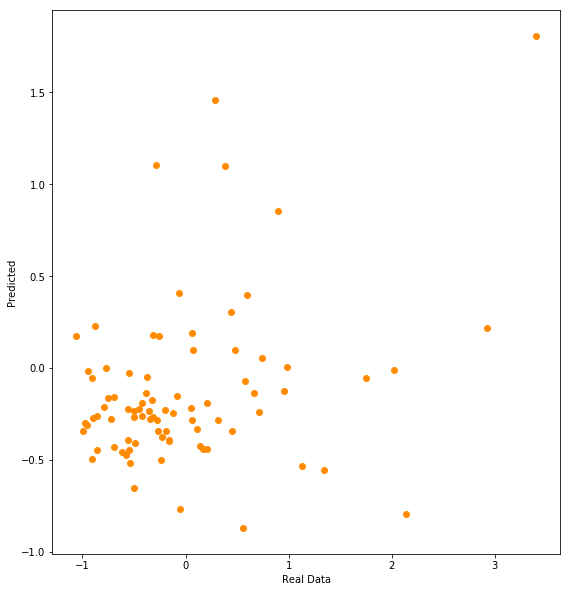

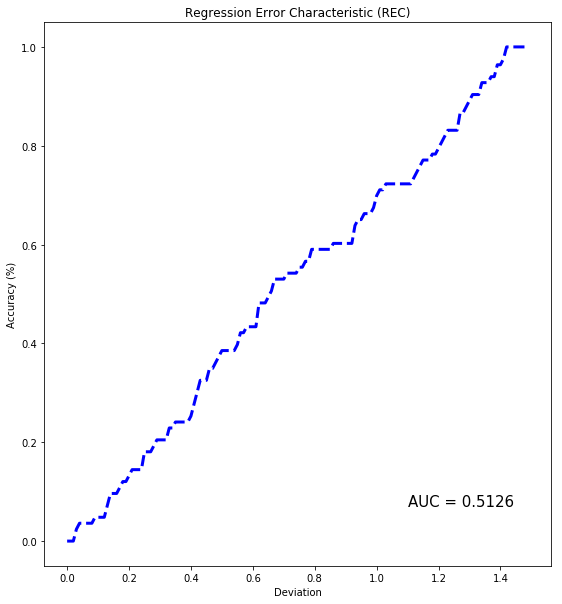

In [15]:
# Visualising the Random Forest Regression Results
# Loading Packages
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
#from sklearn import linear_model
from sklearn import datasets
from scipy.integrate import simps

# Function for Regression Error Characteritic Curve

def REC(y_val , y_predval):
    
    # initilizing the lists
    Accuracy = []
    
    # initializing the values for Epsilon
    Begin_Range = 0
    End_Range = 1.5
    Interval_Size = 0.01
    
    # List of epsilons
    Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
    
    # Main Loops
    for i in range(len(Epsilon)):
        count = 0.0
        for j in range(len(y_val)):
            if np.linalg.norm(y_val[j] - y_predval[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_predval[j])**2 ) < Epsilon[i]:
                count = count + 1
        
        Accuracy.append(count/len(y_val))
    
    # Calculating Area Under Curve using Simpson's rule
    AUC = simps(Accuracy , Epsilon ) / End_Range
        
    # returning epsilon , accuracy , area under curve    
    return Epsilon , Accuracy , AUC

# finding the deviation and accuracy, and area under curve for plotting
Deviation, Accuracy, AUC = REC(y_val, y_predval)

# Calculating R^2 of the true and predicted values
RR = r2_score(y_val, y_predval)

# Plotting
plt.figure(figsize=(20 , 10))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_predval,color = "darkorange")
plt.xlabel("Real Data")
plt.ylabel("Predicted")
plt.figure(figsize=(20 , 10))
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
print("R^2 = %0.4f" %RR)


plt.subplot(1, 2, 2)
plt.title("Regression Error Characteristic (REC)")
plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xlabel("Deviation")
plt.ylabel("Accuracy (%)")
plt.text(1.1, 0.07, "AUC = %0.4f" %AUC , fontsize=15)


plt.show()